# California Housing Dataset

Dados contidos:

1.   longitude
2.   latitude
3. housing_median_age: idade média das casas da região;
4. total_rooms: número de quartos contidos na região;
5. total_bedrooms: número de camas contidas na região;
6. population: número de pessoas que vivem na região;
7. households: número de famílias (grupo de pessoas que vivem em uma casa) da região;
8. median_income: renda média da região (medida em dezenas de dólares);
9. median_house_value: Preço médio das casas contidas na região (medida em dólares).




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importação dos dados

In [ ]:
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Análise exploratória

In [ ]:
# Exemplo dos dados contidos
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# Tamanho do dataset
display(train_data.shape, test_data.shape)

(17000, 9)

(3000, 9)

In [ ]:
# Descrição dos dados
print('Train data:')
display(train_data.describe())

print('\nTest data:')
display(test_data.describe())

Train data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



Test data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [ ]:
# Configurações de plotagem
plt.rcParams.update({
    'font.size': 15,
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.labelcolor': 'white',
    'axes.titlecolor': 'white',
    'axes.titlesize': 20,
    'figure.figsize': (13,13)
})

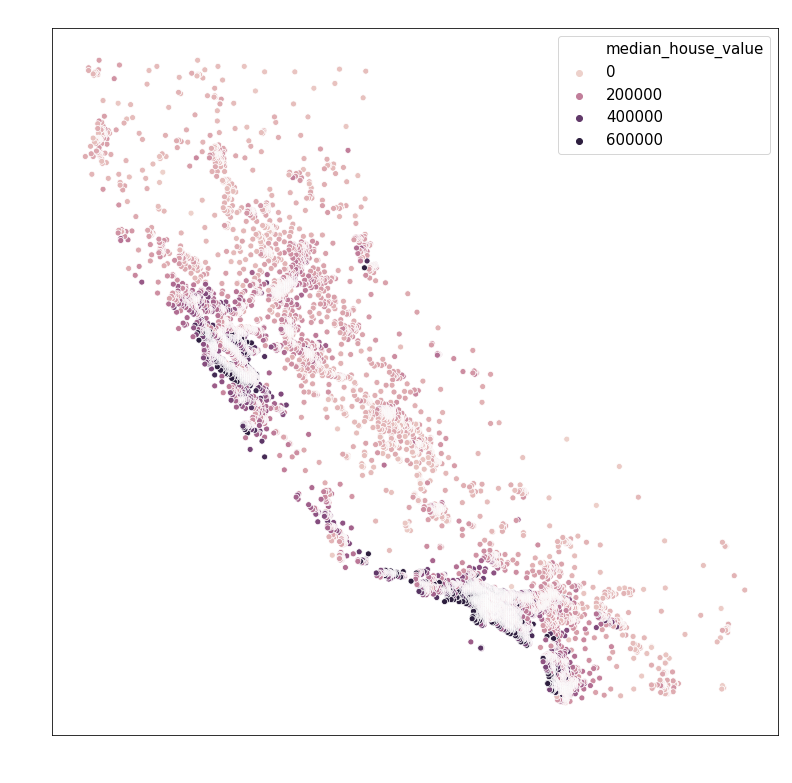

In [ ]:
# Análise geoespacial
plt.title('Scatter Plot:')
sns.scatterplot(data = train_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

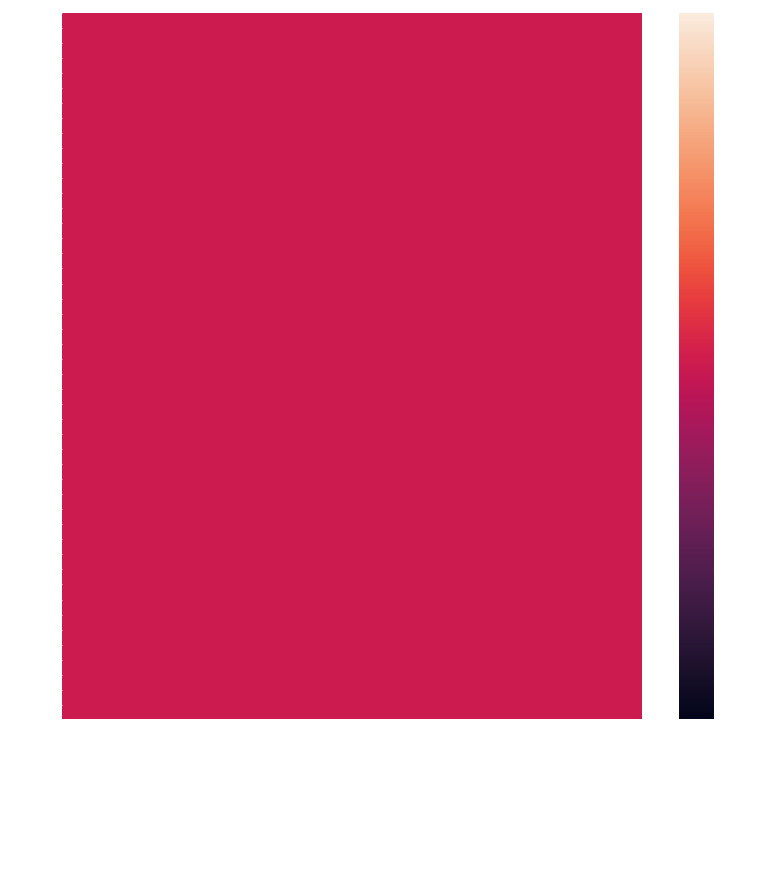

In [ ]:
# Verificação de dados faltantes
train_missing = train_data.isnull()

sns.heatmap(train_missing)

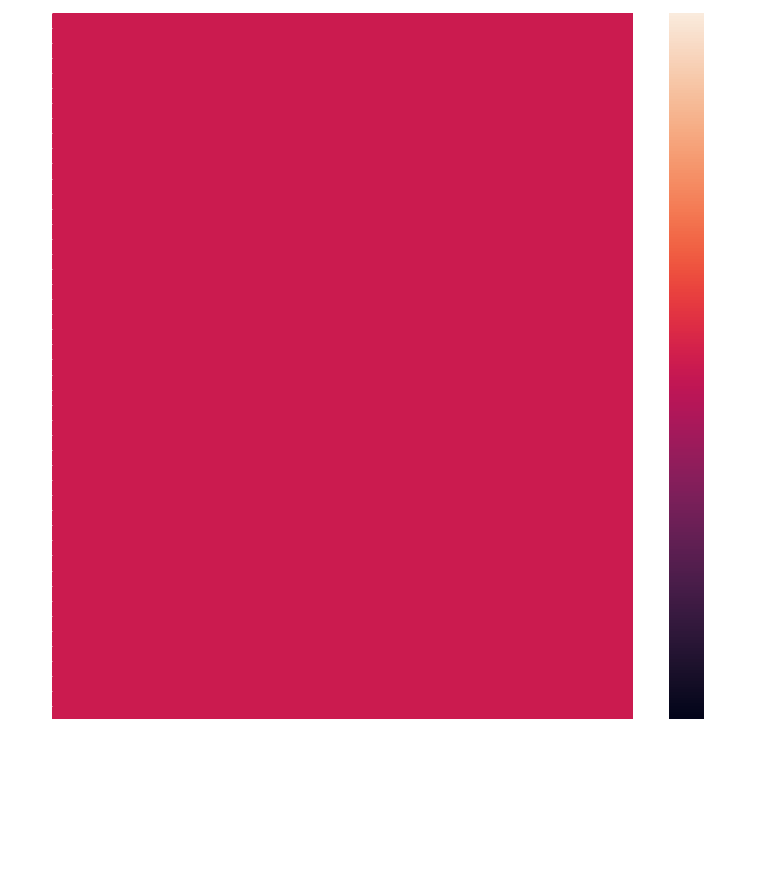

In [ ]:
test_missing = test_data.isnull()
sns.heatmap(test_missing)

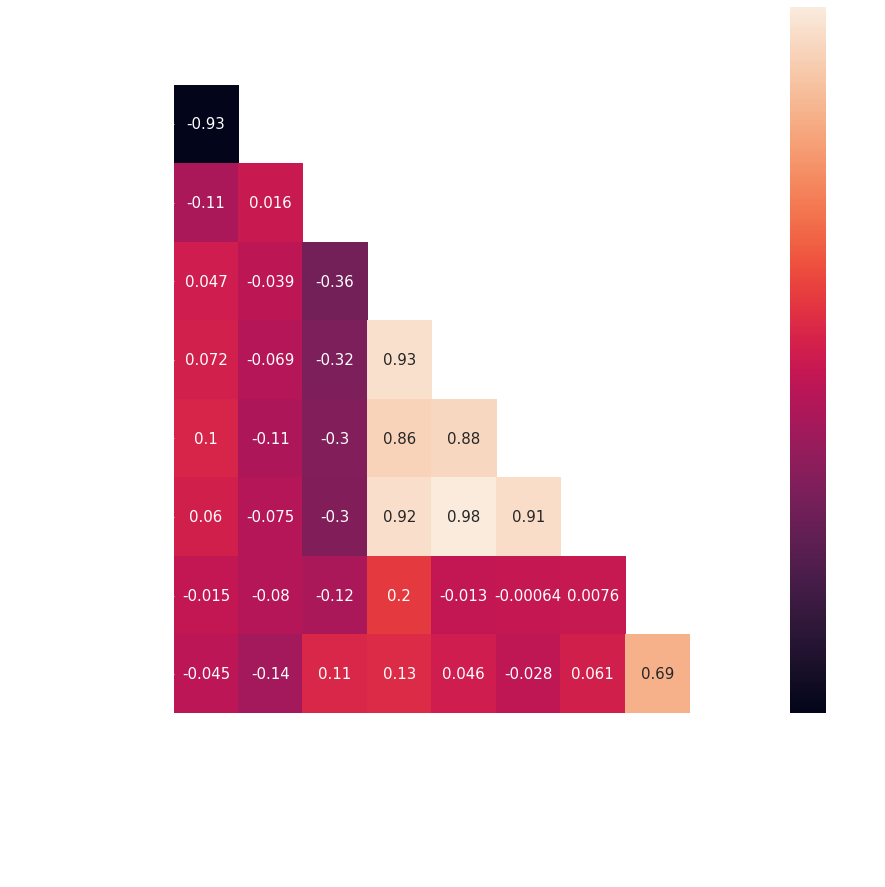

In [ ]:
# Correlação dos dados
def corr_matrix(p_corr):
  mask = np.zeros_like(p_corr)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(p_corr, annot = True, mask = mask)

p_corr = train_data.corr()
corr_matrix(p_corr)

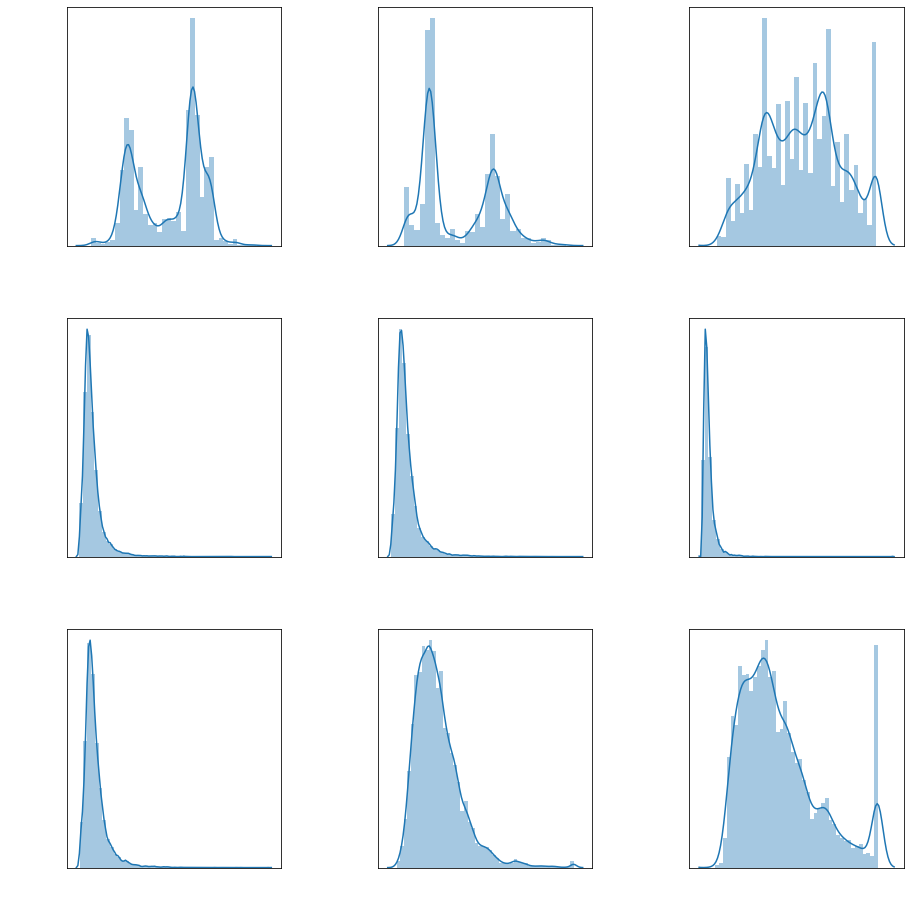

In [ ]:
# Distribuição
def dist(data):
  columns = list(data.columns)

  for i in range(9):
    plt.subplot(3,3,i+1)
    sns.distplot(data[columns[i]])

  plt.tight_layout()

dist(train_data)

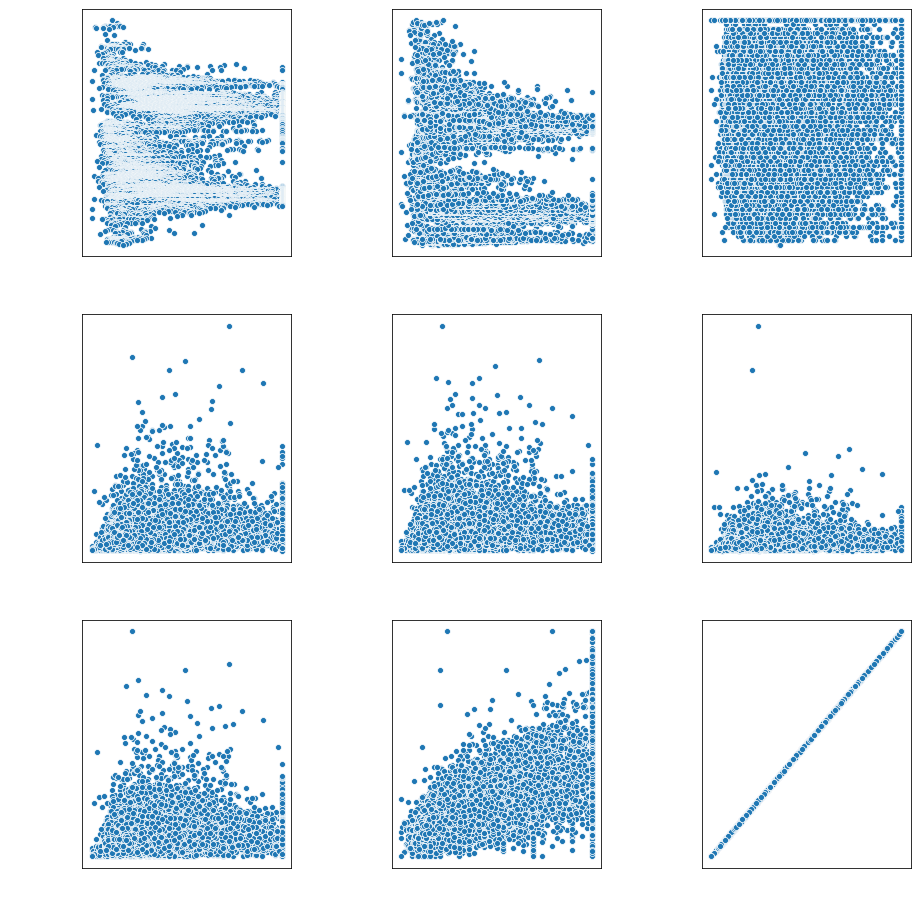

In [ ]:
# Scatter plot em relação ao preço
def scatter(data):
  columns = list(data.columns)
  for i in range(9):
    plt.subplot(3,3,i+1)
    sns.scatterplot(data = train_data, y = columns[i], x = 'median_house_value')

  plt.tight_layout()

scatter(train_data)

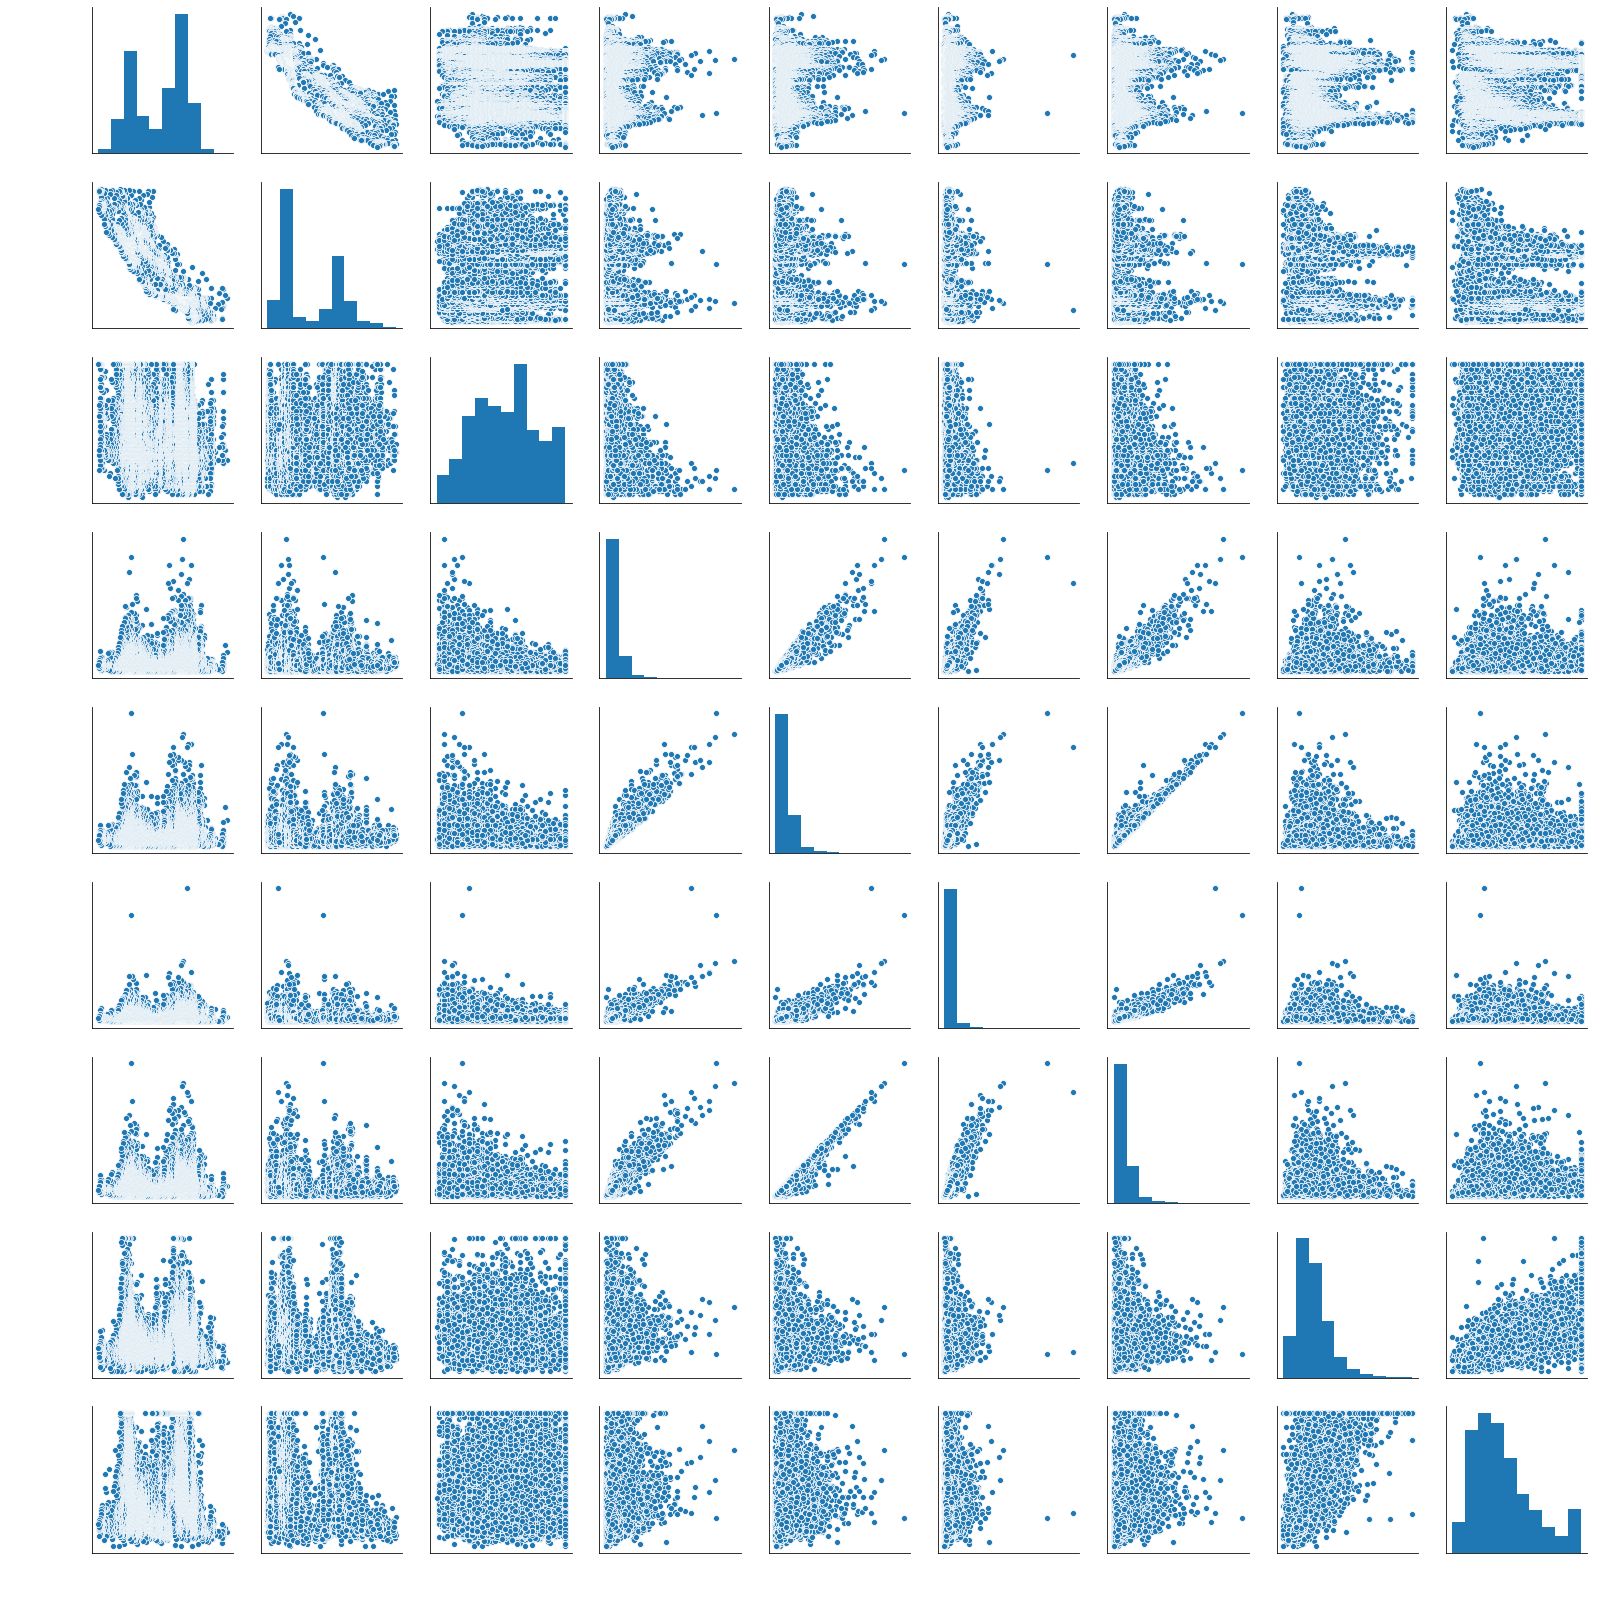

In [ ]:
# Scatter plot entre as variáveis
sns.pairplot(train_data)
plt.tight_layout()

# Pré-processamento e engineering feature

In [ ]:
def syntetic_features(data):
  # Quartos por pessoa
  data['rooms_per_person'] = data['total_rooms']/data['population']

  # Camas por quarto
  data['bedrooms_per_rooms'] = data['total_bedrooms']/data['total_rooms']

  # Pessoas por famílas
  data['person_per_household'] = data['population']/data['households']

syntetic_features(train_data)
syntetic_features(test_data)

In [ ]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person,bedrooms_per_rooms,person_per_household
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,5.529064,0.228617,2.150424
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,6.775908,0.248497,2.438445
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,2.162162,0.241667,2.846154
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,2.914563,0.224517,2.278761
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,2.330128,0.224209,2.381679


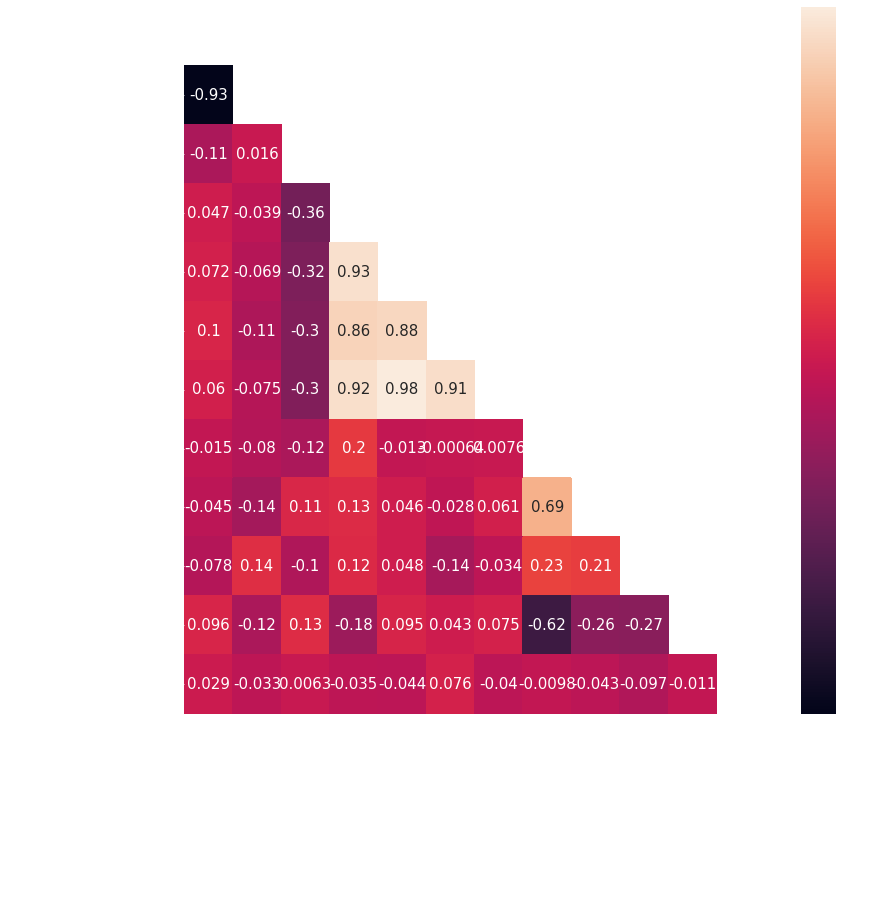

In [ ]:
p_corr = train_data.corr()
corr_matrix(p_corr)

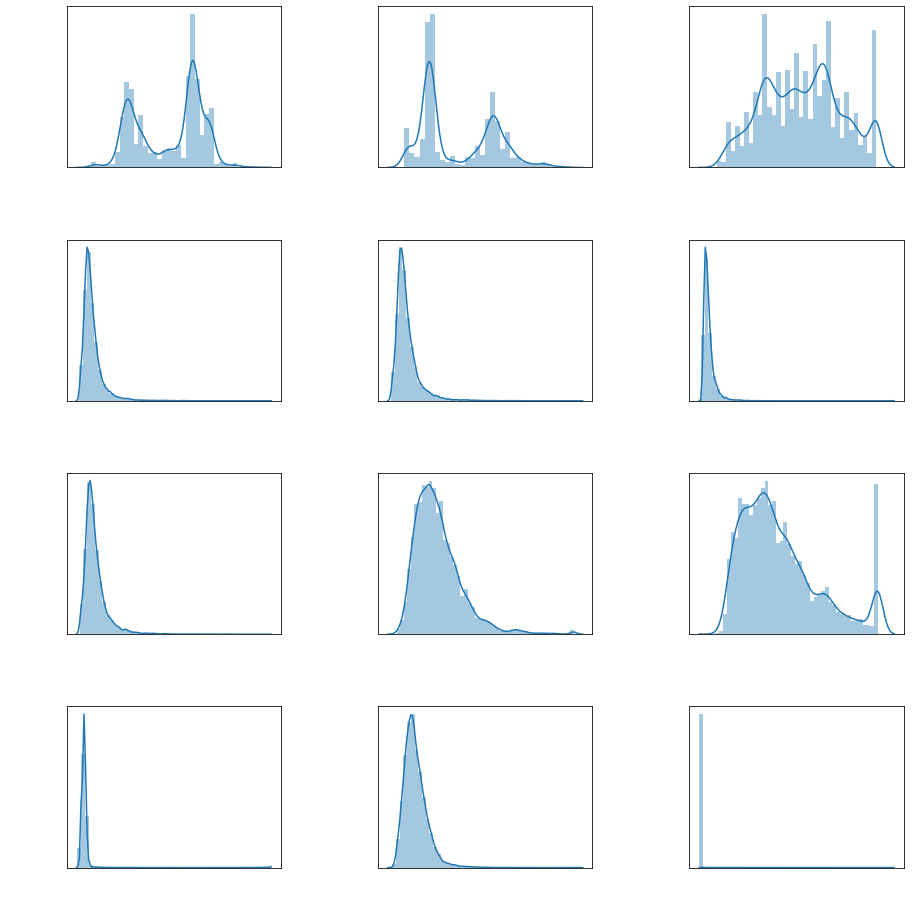

In [ ]:
# Distribuição
def dist(data):
  columns = list(data.columns)

  for i in range(12):
    plt.subplot(4,3,i+1)
    sns.distplot(data[columns[i]])

  plt.tight_layout()

dist(train_data)

In [ ]:
def log_norm(data, columns):
  for column in columns:
    data[column] = np.log(data[column] + 1)

columns = ['total_rooms','total_bedrooms','population','households','rooms_per_person','bedrooms_per_rooms']
log_norm(train_data, columns)
log_norm(test_data, columns)

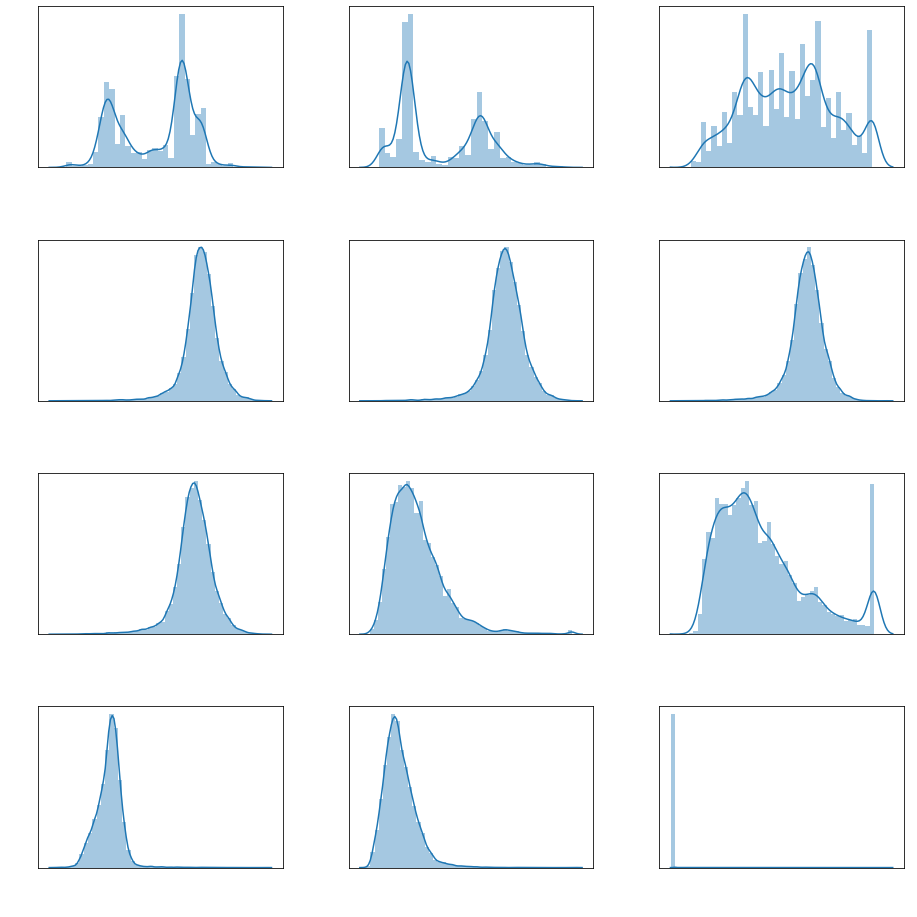

In [ ]:
dist(train_data)

In [ ]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person,bedrooms_per_rooms,person_per_household
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,7.635028,6.058847,7.028796,5.988784,3.883578,207300.912353,1.058118,0.191826,2.976337
std,2.005166,2.137340,12.586937,0.741253,0.720890,0.730782,0.721585,1.908157,115983.764387,0.241251,0.045716,4.037838
min,-124.350000,32.540000,1.000000,1.098612,0.693147,1.386294,0.693147,0.499900,14999.000000,0.017904,0.095310,0.692308
25%,-121.790000,33.930000,18.000000,7.288244,5.697093,6.673298,5.645447,2.566375,119400.000000,0.925040,0.161317,2.432609
50%,-118.490000,34.250000,29.000000,7.662938,6.075346,7.063048,6.016157,3.544600,180400.000000,1.078836,0.184771,2.816872
75%,-118.000000,37.720000,37.000000,8.055872,6.475818,7.451242,6.407292,4.767000,265000.000000,1.193256,0.215004,3.279435
max,-114.310000,41.950000,52.000000,10.543709,8.771215,10.482430,8.713253,15.000100,500001.000000,4.029312,0.693147,502.461538


In [ ]:
def clipping(data):
  data['total_rooms'].clip(lower = 4, inplace = True)
  data['total_bedrooms'].clip(lower = 3, inplace = True)
  data['households'].clip(lower = 3, inplace = True)
  data['population'].clip(lower = 4, inplace = True)
  data['rooms_per_person'].clip(upper = 2, inplace = True)
  data['bedrooms_per_rooms'].clip(upper = 0.4, inplace = True)
  data['person_per_household'].clip(upper = 7.5, inplace = True)

clipping(train_data)
clipping(test_data)

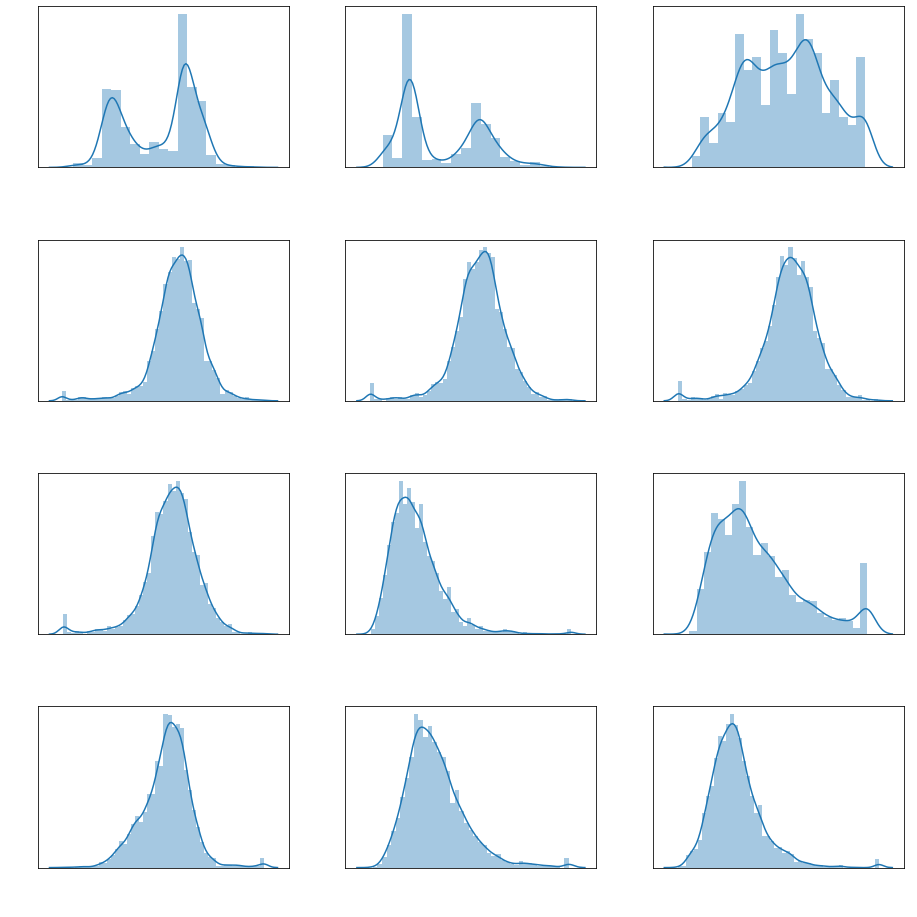

In [ ]:
dist(test_data)

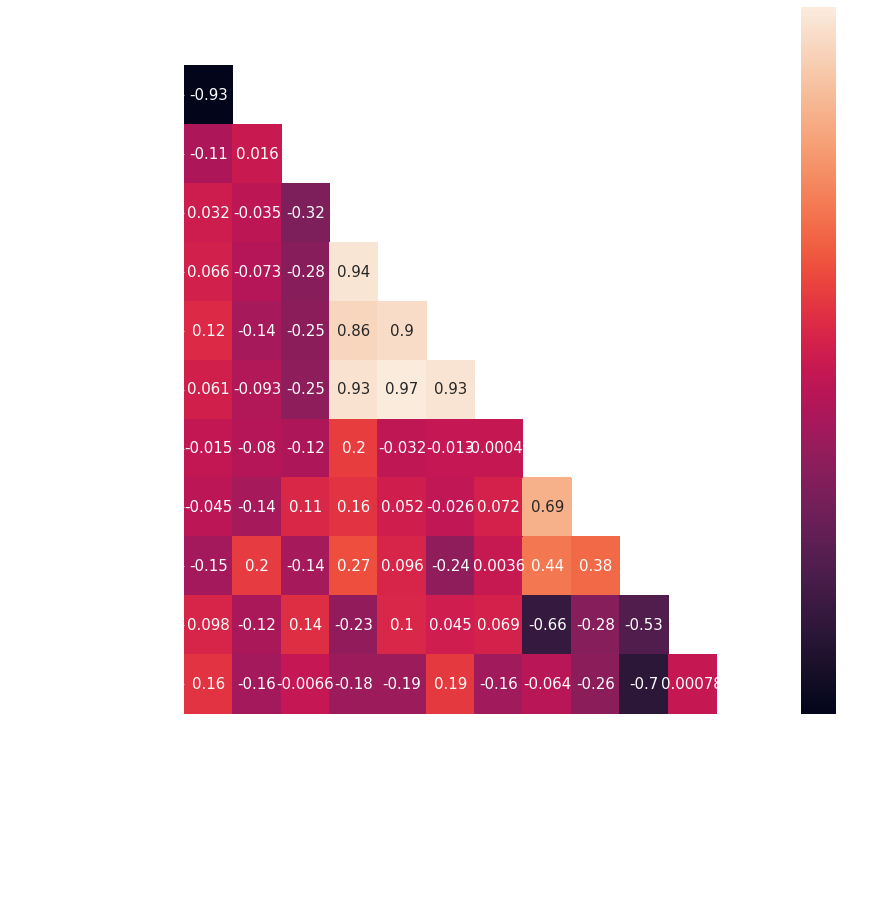

In [ ]:
p_corr = train_data.corr()
corr_matrix(p_corr)

In [ ]:
# Scaling target
train_data['median_house_value'] = train_data['median_house_value']/100000
test_data['median_house_value'] = test_data['median_house_value']/100000

train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person,bedrooms_per_rooms,person_per_household
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,7.636617,6.061995,7.031943,5.992018,3.883578,2.073009,1.055647,0.191597,2.923836
std,2.005166,2.137340,12.586937,0.732192,0.705032,0.715227,0.705700,1.908157,1.159838,0.226581,0.044263,0.775068
min,-124.350000,32.540000,1.000000,4.000000,3.000000,4.000000,3.000000,0.499900,0.149990,0.017904,0.095310,0.692308
25%,-121.790000,33.930000,18.000000,7.288244,5.697093,6.673298,5.645447,2.566375,1.194000,0.925040,0.161317,2.432609
50%,-118.490000,34.250000,29.000000,7.662938,6.075346,7.063048,6.016157,3.544600,1.804000,1.078836,0.184771,2.816872
75%,-118.000000,37.720000,37.000000,8.055872,6.475818,7.451242,6.407292,4.767000,2.650000,1.193256,0.215004,3.279435
max,-114.310000,41.950000,52.000000,10.543709,8.771215,10.482430,8.713253,15.000100,5.000010,2.000000,0.400000,7.500000


In [ ]:
# Seleção de variáveis
train_x = train_data[['median_income', 'rooms_per_person', 'bedrooms_per_rooms', 'person_per_household', 'longitude', 'latitude']]
test_x = test_data[['median_income', 'rooms_per_person', 'bedrooms_per_rooms', 'person_per_household', 'longitude', 'latitude']]

train_y = pd.DataFrame(train_data['median_house_value'])
test_y = pd.DataFrame(test_data['median_house_value'])

In [ ]:
display(train_x, train_y)

,median_income,rooms_per_person,bedrooms_per_rooms,person_per_household,longitude,latitude
0,1.4936,1.876264,0.205889,2.150424,-114.31,34.19
1,1.8200,2.000000,0.221940,2.438445,-114.47,34.40
2,1.6509,1.151256,0.216455,2.846154,-114.56,33.69
3,3.1917,1.364704,0.202546,2.278761,-114.57,33.64
4,1.9250,1.203011,0.202295,2.381679,-114.57,33.57
...,...,...,...,...,...,...
16995,2.3571,1.236727,0.163578,2.457995,-124.26,40.58
16996,2.5179,1.087665,0.202758,2.567742,-124.27,40.69
16997,3.0313,1.148015,0.180951,2.728070,-124.30,41.84
16998,1.9797,1.117941,0.187796,2.715481,-124.30,41.80


,median_house_value
0,0.669
1,0.801
2,0.857
3,0.734
4,0.655
...,...
16995,1.114
16996,0.790
16997,1.036
16998,0.858


In [ ]:
# Normalização
def min_max_norm(data):
  norm = 2*((data - data.min())/(data.max() - data.min())) - 1

  return norm

In [ ]:
train_x = min_max_norm(train_x)
test_x = min_max_norm(test_x)

In [ ]:
display(train_x.describe())

,median_income,rooms_per_person,bedrooms_per_rooms,person_per_household,longitude,latitude
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-0.533292,0.047117,-0.367969,-0.344410,-0.046237,-0.344267
std,0.263190,0.228628,0.290546,0.227704,0.399436,0.454270
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.714973,-0.084670,-0.566725,-0.488725,-0.490040,-0.704570
50%,-0.580047,0.070515,-0.412776,-0.375834,0.167331,-0.636557
75%,-0.411443,0.185969,-0.214323,-0.239940,0.264940,0.100956
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Criação e treinamento dos modelos lineares

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

## Regressão Linear sem regularização

In [ ]:
linear = LinearRegression()
linear.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linear_scores = cross_val_score(linear, train_x, train_y, cv = 10, scoring = 'neg_root_mean_squared_error')
linear_scores.mean()*100000

-69230.11662706567

## Regressão Linear com reg. l2

In [ ]:
l2_reg = Ridge()
l2_reg.fit(train_x, train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
l2_scores = cross_val_score(l2_reg, train_x, train_y, cv = 10, scoring = 'neg_root_mean_squared_error')
l2_scores.mean()*100000

-69208.30239290756

## Regressão Linear com reg. l1

In [ ]:
l1_reg = Lasso()
l1_reg.fit(train_x, train_y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
l1_scores = cross_val_score(l1_reg, train_x, train_y, cv = 10, scoring = 'neg_root_mean_squared_error')
l1_scores.mean()*100000

-116019.20173030035

## Regressão Linear com ElasticNet

In [ ]:
el_reg = ElasticNet()
el_reg.fit(train_x, train_y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
el_scores = cross_val_score(el_reg, train_x, train_y, cv = 10, scoring = 'neg_root_mean_squared_error')
el_scores.mean()*100000

-116019.20173030035

# Avaliando os modelos lineares

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('RMSE:')
print(f'Regressão linear: {100000*(mean_squared_error(test_y, linear.predict(test_x)))**.5}')
print(f'Regressão linear + Ridge: {100000*(mean_squared_error(test_y, l2_reg.predict(test_x)))**.5}')
print(f'Regressão linear + Lasso: {100000*(mean_squared_error(test_y, l1_reg.predict(test_x)))**.5}')
print(f'Regressão linear + ElasticNet: {100000*(mean_squared_error(test_y, el_reg.predict(test_x)))**.5}')

RMSE:
Regressão linear: 68608.35596552574
Regressão linear + Ridge: 68605.5827583625
Regressão linear + Lasso: 113110.1865814685
Regressão linear + ElasticNet: 113110.1865814685


# Teste com PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def features_selection(data):
  data_c = data.copy()
  y = data_c.pop('median_house_value')
  x = data_c

  return x, pd.DataFrame(y)

train_x, train_y = features_selection(train_data)
test_x, test_y = features_selection(test_data)

train_x, test_x = min_max_norm(train_x), min_max_norm(test_x)

In [ ]:
display(train_x, train_y)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person,bedrooms_per_rooms,person_per_household
0,1.000000,-0.649309,-0.450980,0.415968,0.440853,-0.097984,0.105883,-0.862940,0.875146,-0.274153,-0.571627
1,0.968127,-0.604676,-0.294118,0.510639,0.577020,-0.065174,0.099158,-0.817920,1.000000,-0.168794,-0.487011
2,0.950199,-0.755579,-0.372549,-0.211261,-0.249799,-0.441215,-0.380148,-0.841244,0.143590,-0.204802,-0.367232
3,0.948207,-0.766206,-0.490196,0.013050,-0.021681,-0.307017,-0.151114,-0.628722,0.358965,-0.296095,-0.533923
4,0.948207,-0.781084,-0.254902,0.003334,-0.033146,-0.247890,-0.099583,-0.803437,0.195812,-0.297746,-0.503687
...,...,...,...,...,...,...,...,...,...,...,...
16995,-0.982072,0.708820,1.000000,0.132190,0.032325,-0.132657,0.019910,-0.743838,0.229833,-0.551884,-0.481267
16996,-0.984064,0.732200,0.372549,0.149859,0.133553,-0.047918,0.100664,-0.721659,0.079424,-0.294704,-0.449025
16997,-0.990040,0.976621,-0.372549,0.189792,0.135513,-0.035272,0.093837,-0.650846,0.140319,-0.437850,-0.401923
16998,-0.990040,0.968119,-0.294118,0.189221,0.148929,-0.022172,0.110296,-0.795892,0.109974,-0.392921,-0.405621


,median_house_value
0,0.669
1,0.801
2,0.857
3,0.734
4,0.655
...,...
16995,1.114
16996,0.790
16997,1.036
16998,0.858


In [ ]:
# Cumulative variance curve
def CVC(data):
  hist = []
  sum = 0

  for i in range(data.shape[1]):
    pca = PCA(n_components = i + 1)
    pca.fit(data)
    exp_ratio = pca.explained_variance_ratio_[i]

    sum += exp_ratio
    hist.append(sum)

  plt.plot(hist)

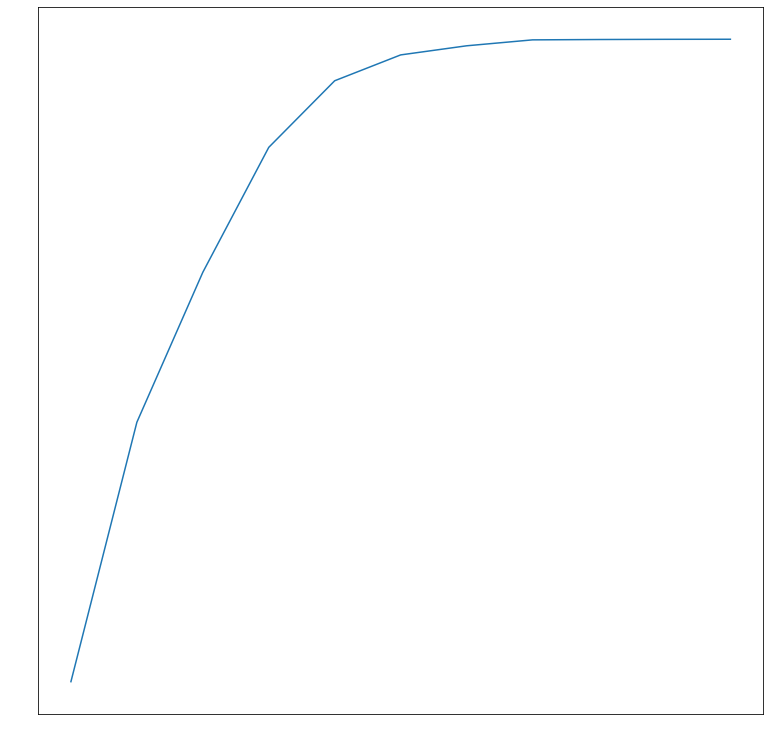

In [ ]:
CVC(train_x)

In [ ]:
pca = PCA(n_components = 6)
train_x_proj = pd.DataFrame(pca.fit_transform(train_x))
test_x_proj = pd.DataFrame(pca.transform(test_x))

In [ ]:
linear = LinearRegression()
linear.fit(train_x_proj, train_y)

linear_scores = cross_val_score(linear, train_x_proj, train_y, cv = 10, scoring = 'neg_root_mean_squared_error')
linear_scores.mean()*-100000

68874.20526905531